# Initial remarks

This notebook was made as an combination of tools of the following work of the kaggle community in purpose to improve the overall prediction of digits of the MNIST database:

1. [MNIST Digit Recognigtion 0.9974 With Tensorflow:](https://www.kaggle.com/code/peremartramanonellas/mnist-digit-recognigtion-0-9974-with-tensorflow) The main concepts regarding Image Augmentation were used with the function `ImageDataGenerator` from Keras.
2. [mnist_simple_CNN:](https://www.kaggle.com/code/abanoubkased/mnist-simple-cnn) Main ideas of image analysis and overall structure from CNN
3. Other Neural Networks and transformation to improve the overall score

With these approaches it was registered a maximum prediction accuracy of 99.33%. 

As an initial point the main libraries were loaded, with the use of Tensorflow and Keras for the Neural Network construction and the pandas, numpy and matplotlib for data organization and plotting.

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing
import tensorflow as tf # Neural Network
import matplotlib.pyplot as plt # Plotting tool
from keras.preprocessing.image import ImageDataGenerator #Image augmentation
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Then, the test dataset was loaded, where the information was organized with two main types of columns:

1. label: the reference for the classification model
2. Pixels: 28x28 columns where the image data is consolidated.

In [2]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For analysis, the first 5 images of the dataset were plotted. As presented on the next cell the data is registered in color pixels, being important to change them to black and white for improving the model performance. This was accomplished by dividing all the values by 255.

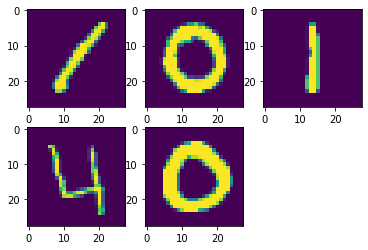

In [4]:
# Extracting first 5 columns
picture_test=train.copy().head(5).drop(columns='label')  
# Reshaping dataframe from numpy to fit the plotting requirements
p_test=np.array(picture_test).reshape(-1,28,28,1)
# Plotting resulting images
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(p_test[i])

With these considerations the train labels were organized to fit the CNN modeling

In [5]:
#Training data
train_data=train.drop(columns='label')/255
# Labels for training
train_label=train["label"]

# Model development

As an additional tool, a Image Data Generator was used to increase te total availability of images, from simple rotation, zoom and shift range. Additional information could be consulted in  [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [6]:
datagen = ImageDataGenerator(
        rotation_range=5, #Degree from random rotations
        zoom_range = 0.1, 
        width_shift_range=0.05, #Fraction of total width
        height_shift_range=0.05 #Fraction of total height
)  

With the variable `datagen` and with the training data the final variable that contains all the transformed images and their labels was saved in the `Train_gen` variable.

In [7]:
# Finding the mean of the data
X_mean = np.array(train_data).reshape(-1, 28, 28, 1).mean(axis=0)
# Fitting the current database (Columns and final label) to the ImageDataGenerator object
datagen.fit(np.array(train_data).reshape(-1, 28, 28, 1) - X_mean)
# Saving the information on the train_gen variable
train_gen = datagen.flow(np.array(train_data).reshape(-1, 28, 28, 1), 
                         train_label, batch_size=100)

With these new data the Neural Model is presented on the next cell using the following types of layers:

1. Convolution 2D
2. Max pooling 2D
3. Flatten
4. Dense
5. Dropout

Alongside this, an Adam optimizer was used alongside the loss measured by `SparseCategoricalCrossentropy` and with accuracy as the main tool to visualize the system development.

In [8]:
# Creation of neural network
model = tf.keras.Sequential()
# Image transformation and analysis
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[5,5], activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2,2], strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[5,5], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2,2], strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
# Final prediction
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilator
model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
)

#Builing of the model with the related input shape
model.build([None, 28, 28, 1])

2022-09-04 01:45:07.385471: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Then, the model is fitted with all the training data in the following code

In [9]:
model.fit(train_gen,epochs=20)

2022-09-04 01:45:07.664869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
420/420 [==============================] - 44s 103ms/step - loss: 0.2097 - accuracy: 0.9345
Epoch 2/20
420/420 [==============================] - 43s 103ms/step - loss: 0.0648 - accuracy: 0.9799
Epoch 3/20
420/420 [==============================] - 43s 102ms/step - loss: 0.0467 - accuracy: 0.9849
Epoch 4/20
420/420 [==============================] - 43s 102ms/step - loss: 0.0379 - accuracy: 0.9879
Epoch 5/20
420/420 [==============================] - 42s 101ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 6/20
420/420 [==============================] - 42s 100ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 7/20
420/420 [==============================] - 42s 99ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 8/20
420/420 [==============================] - 42s 99ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 9/20
420/420 [==============================] - 42s 100ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 10/20
420/420 [==============================] - 42s 99ms/step - loss

In [10]:
#tf.one_hot(np.array(train_label), 10)

Finally, the test data is loaded with the same 255 division for improving the mode performance and the trained model is used for classifing them.

In [11]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")/255

In [12]:
# Prediction
predictions = model.predict(tf.reshape(test, [-1, 28, 28, 1]))
# Change to relate the results to the exact integer
predictions = tf.math.argmax(predictions, axis = -1)
# Passing information to dataframe
predictions = pd.Series(predictions, name='Label')
# Labels of images (Ids)
image_id = pd.Series(range(1,28001), name = 'ImageId')
# Final Dataframe and CSV submission
predictions = pd.concat([image_id, predictions], axis = 1)
predictions.to_csv('submission.csv', index=False)